# Practica BoW de NLP

La siguiente practica es realizada para poder entender el funcionamiento de una BoW siguiendo el procedimiento visto en clase 
Utilizamos los datos de Kaggle donde el objetivo es poder clasificar si el tweet es depresivo o no.  


By Eric Lemus Avalos 



In [31]:
# Librerias necesarias 
import nltk 
import os
import shutil
import numpy as np 

In [9]:
# !pip install kaggle

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105796 sha256=cc0e69afcff9971b343a16338b6c5c32d82d5146a302d2a5ad5a457cf4815532
  Stored in directory: c:\users\ericl\appdata\local\pip\cache\wheels\46\d2\26\84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle


In [23]:
# Establecemos el directorio de trabajo 
os.chdir(r'c:\Users\ericl\Transformers\Practicas_nlp')
os.getcwd()

'c:\\Users\\ericl\\Transformers\\Practicas_nlp'

In [27]:
os.makedirs('.kaggle', exist_ok=True)
shutil.move(r'C:\Users\ericl\Downloads\kaggle.json', r'.kaggle\kaggle.json')
os.environ['KAGGLE_CONFIG_DIR'] = os.path.abspath('.kaggle')

In [28]:
print('Directorio de trabajo actual:', os.getcwd())
print('Contenido de .kaggle:', os.listdir('.kaggle'))
print('KAGGLE_CONFIG_DIR:', os.environ['KAGGLE_CONFIG_DIR'])

Directorio de trabajo actual: c:\Users\ericl\Transformers\Practicas_nlp
Contenido de .kaggle: ['kaggle.json']
KAGGLE_CONFIG_DIR: c:\Users\ericl\Transformers\Practicas_nlp\.kaggle


In [31]:
# Descargar el dataset from Kaggle
!kaggle datasets download -d gargmanas/sentimental-analysis-for-tweets

Dataset URL: https://www.kaggle.com/datasets/gargmanas/sentimental-analysis-for-tweets
License(s): GPL-2.0




  0%|          | 0.00/476k [00:00<?, ?B/s]
100%|██████████| 476k/476k [00:00<00:00, 2.14MB/s]
100%|██████████| 476k/476k [00:00<00:00, 2.14MB/s]


In [2]:
import zipfile

with zipfile.ZipFile('sentimental-analysis-for-tweets.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [3]:
print('Archivos después de la extracción:', os.listdir('.'))

Archivos después de la extracción: ['.kaggle', 'BoW.ipynb', 'sentimental-analysis-for-tweets.zip', 'sentiment_tweets3.csv']


In [4]:
ruta_csv = 'sentiment_tweets3.csv'

import pandas as pd

def obtener_datos(ruta_archivo: str) -> list:
    try:
        df = pd.read_csv(ruta_archivo)
        mensajes = df['message to examine'].tolist()
        labels = df['label (depression result)'].tolist()
        
        return mensajes, labels
    except Exception as e:
        print(f"Error al leer el archivo: {e}")
        return [], []

tweets, targets = obtener_datos(ruta_csv)

In [15]:
tweets[:10]

['just had a real good moment. i missssssssss him so much, ',
 'is reading manga  http://plurk.com/p/mzp1e',
 '@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8 ',
 "@lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting evidence, though. ",
 'ADD ME ON MYSPACE!!!  myspace.com/LookThunder',
 'so sleepy. good times tonight though ',
 '@SilkCharm re: #nbn as someone already said, does fiber to the home mean we will all at least be regular now ',
 '23 or 24ï¿½C possible today. Nice ',
 'nite twitterville  workout in the am  -ciao',
 "@daNanner Night, darlin'!  Sweet dreams to you "]

Counter({0: 8000, 1: 2314})


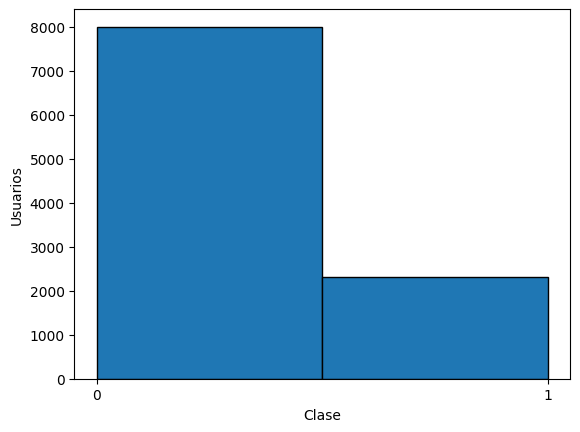

In [13]:
from collections import Counter
import matplotlib.pyplot as plt 

valid_labels = {0, 1}
filtered_data = [(tweet, label) for tweet, label in zip(tweets, targets) if label in valid_labels]
filtered_tweets, filtered_targets = zip(*filtered_data)

print(Counter(filtered_targets))
plt.hist(filtered_targets, bins=2, edgecolor='black')
plt.ylabel('Usuarios')
plt.xlabel('Clase')
plt.xticks([0, 1])  
plt.show()

In [14]:
random_state = 44 

from sklearn.model_selection import train_test_split

# 80% train 20% test
tweets_train_val, tweets_test, targets_train_val, targets_test = train_test_split(
    tweets, targets, test_size=0.2, random_state=random_state, stratify=targets
)

# 75% train_val y 25% validation
tweets_train, tweets_val, targets_train, targets_val = train_test_split(
    tweets_train_val, targets_train_val, test_size=0.25, random_state=random_state, stratify=targets_train_val
)

In [25]:
def get_text_from_file(path_file: str ,target_file: str) ->  list:  
    file_txt = []
    target_txt = []

    with open(path_file, ' r') as f_corpus, open(target_file, 'r') as f_target:
        for tweet in f_corpus:
            file_txt += 1
        for target in f_target:
            target_txt += 1
    
    return file_txt,target_txt

# file_txt,target_txt = get_text_from_file

# In this case we have the data from Kaggle, so this function in not necesary. (A veces escribo en ingles para practicar)

In [17]:
# Construccio del vocabulario
from nltk.tokenize import TweetTokenizer
tokenizator = TweetTokenizer(reduce_len= True)


corpus_palabras = []

for tweet in tweets: 
    corpus_palabras += tokenizator.tokenize(tweet)

fdist = nltk.FreqDist(corpus_palabras) 
fdist

FreqDist({'.': 5734, '!': 5278, ',': 4239, 'to': 3783, 'the': 3472, 'a': 2982, 'I': 2913, 'and': 2623, 'you': 2173, 'of': 1801, ...})

In [41]:
# Trabajando utilizamos la funcion TfIdfVectorizer de sklearn, maneja objetos del tipo sparse 

# Construccion de diccionario como llave el ranking de la palabra deacuerdo a su frecuencia.
# 
# En este caso si tenemos el orden del ranking
# 

def order_dic_frec(fdic): 
    aux = [(fdic[key], key ) for key in fdic]
    aux.sort()
    aux.reverse()
    return aux

V = order_dic_frec(fdist)
V = V[:5000] # Solo nos quedamos con los 5000 mas frec

In [42]:
# es una tabla hash 
dict_index = dict()
count = 0 

for weight, word in V: 
    dict_index[word] = count
    count += 1 

dict_index

{'.': 0,
 '!': 1,
 ',': 2,
 'to': 3,
 'the': 4,
 'a': 5,
 'I': 6,
 'and': 7,
 'you': 8,
 'of': 9,
 'depression': 10,
 'my': 11,
 'is': 12,
 'for': 13,
 '?': 14,
 'it': 15,
 'in': 16,
 '...': 17,
 'i': 18,
 'with': 19,
 'that': 20,
 'on': 21,
 'me': 22,
 'have': 23,
 ':': 24,
 'so': 25,
 '-': 26,
 'be': 27,
 'your': 28,
 "I'm": 29,
 'but': 30,
 'are': 31,
 'just': 32,
 'was': 33,
 'this': 34,
 '"': 35,
 'out': 36,
 'at': 37,
 'not': 38,
 '..': 39,
 'good': 40,
 'like': 41,
 'day': 42,
 'all': 43,
 'up': 44,
 'from': 45,
 '&': 46,
 'about': 47,
 'love': 48,
 '\x80': 49,
 'â': 50,
 'get': 51,
 'can': 52,
 'now': 53,
 '>': 54,
 "'": 55,
 '¦': 56,
 'do': 57,
 'know': 58,
 'Depression': 59,
 ')': 60,
 '<': 61,
 'Emoji': 62,
 'time': 63,
 'will': 64,
 '(': 65,
 'today': 66,
 'or': 67,
 'go': 68,
 'u': 69,
 'one': 70,
 'going': 71,
 'what': 72,
 'some': 73,
 'as': 74,
 "it's": 75,
 'more': 76,
 'if': 77,
 "don't": 78,
 'too': 79,
 'when': 80,
 'see': 81,
 'got': 82,
 'anxiety': 83,
 'lol': 84,

In [38]:
# Construir Bolsa de palabras 

def BoW(text, vocabulario, dict_index): 
    BOW = np.zeros((len(text),len(vocabulario)),dtype = int)
     
    cont_doc = 0 

    for doc in text: 
        fdist_doc = nltk.FreqDist(tokenizator.tokenize(doc))

        #llenar la bolsa 
        for word in fdist_doc:
            if word in dict_index: 
                BOW[cont_doc,dict_index[word]] = 1 
        cont_doc += 1  
    
    return BOW 

In [48]:
BOW_tr = BoW(tweets_train,V,dict_index)
BOW_tr.shape

(6188, 5000)

In [50]:
# Lo mismo para la valida
BOW_val = BoW(tweets_val,V,dict_index)
BOW_val.shape

(2063, 5000)

Counter({0: 1600, 1: 463})


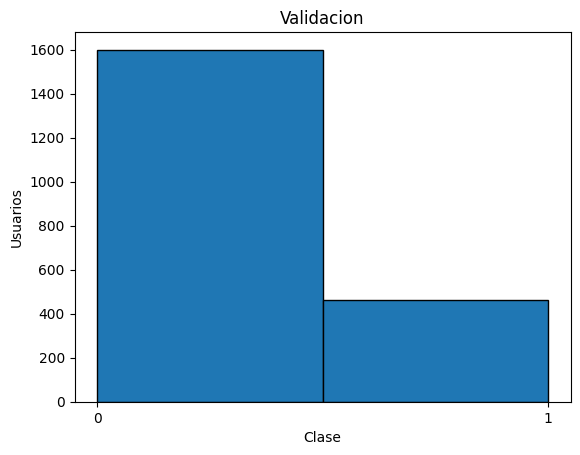

In [45]:
valid_labels = {0, 1}
filtered_data = [(tweet, label) for tweet, label in zip(tweets_val, targets_val) if label in valid_labels]
filtered_tweets, filtered_targets = zip(*filtered_data)

print(Counter(filtered_targets))
plt.hist(filtered_targets, bins=2, edgecolor='black')
plt.title('Validacion')
plt.ylabel('Usuarios')
plt.xlabel('Clase')
plt.xticks([0, 1])  
plt.show()

### Clasificacion 

Usamos un SVM para clasificar los tweets 

In [46]:
from sklearn import svm 
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support


In [52]:
parametros = {'C': [0.5, .12, .25, .5, 1, 2, 4]}

clasificador = svm.LinearSVC(class_weight = 'balanced') #penalizar la proporsion 
grid =  GridSearchCV(estimator = clasificador, param_grid = parametros, n_jobs = 8, scoring = "f1_macro",cv = 5)
grid.fit(BOW_tr, targets_train)
y_pred = grid.predict(BOW_val)

p, r, f, _= precision_recall_fscore_support(targets_val, y_pred, average='macro', pos_label=1)


[[1600    0]
 [  10  453]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1600
           1       1.00      0.98      0.99       463

    accuracy                           1.00      2063
   macro avg       1.00      0.99      0.99      2063
weighted avg       1.00      1.00      1.00      2063



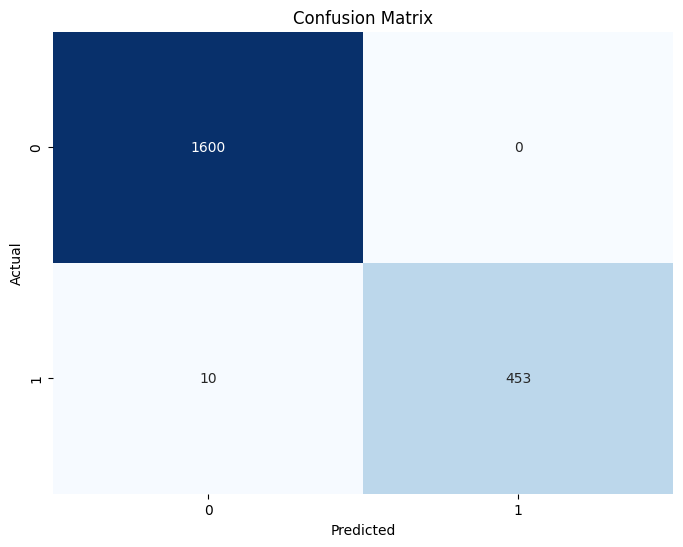

In [55]:
import seaborn as sns

conf_matrix = confusion_matrix(targets_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [58]:
print(metrics.classification_report(targets_val,y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1600
           1       1.00      0.98      0.99       463

    accuracy                           1.00      2063
   macro avg       1.00      0.99      0.99      2063
weighted avg       1.00      1.00      1.00      2063



In [60]:
def mostrar_errores(tweets_val, targets_val, y_pred):
    errores = []

    for tweet, actual, predicho in zip(tweets_val, targets_val, y_pred):
        
        if actual != predicho:
            errores.append((tweet, actual, predicho))
    
    return errores


errores = mostrar_errores(tweets_val, targets_val, y_pred)

print(f"Total de errores: {len(errores)}\n")
for i, (tweet, actual, predicho) in enumerate(errores, start=1):
    print(f"Error {i}:")
    print(f"Tweet: {tweet}")
    print(f"Actual: {actual}, Predicho: {predicho}")
    print("---")

Total de errores: 10

Error 1:
Tweet: *talking about me*anxiety: he's overdepression: never started
Actual: 1, Predicho: 0
---
Error 2:
Tweet: 2
Actual: 1, Predicho: 0
---
Error 3:
Tweet: Please pray for me. I am currently working on a blog article about Depression.Depression is not a joke and a very sensitive issue. Writing about it is way out of my comfort zone.Pray for wisdom, knowledge & courage. I wouldn't be able to do it without your prayers.Thank you
Actual: 1, Predicho: 0
---
Error 4:
Tweet: @JamesMelville Blair, other than Iraq.  Brown was good - his recovery plan was copied by the G20 avoiding another Great Depression.May is a shambles.But Cameron was the worst because he applied Project Fear instead of showing the benefits of the EU, and now look at us.
Actual: 1, Predicho: 0
---
Error 5:
Tweet: Perspective 
Actual: 1, Predicho: 0
---
Error 6:
Tweet: Me: Okay, time to get over myself. I'm not spending another day in bed, wallowing in depression.My brian:  pic.twitter.com/Yw